# Introduction to Geopandas


## Downloading data

For this lesson we are using data in Shapefile format representing distributions of specific beautifully colored fish species called [Damselfish](https://en.wikipedia.org/wiki/Damselfish) and the country borders of Europe. From now on, we are going to download the datafiles at the start of each lesson because of the large size of the data. It is also a good practice to know how to download files from terminal. 

Once you have downloaded the `L2_data.zip` file into your home directory, you can unzip the file using `unzip` command from Terminal (or e.g. 7zip on Windows if working with own computer). Following assumes that the file was downloaded to `/home/jovyan/notebooks/L2` -directory:

``` 
$ cd /home/jovyan/notebooks/L2
$ unzip L2_data.zip
$ ls L2_data
DAMSELFISH_distributions.cpg  DAMSELFISH_distributions.shp  Europe_borders.dbf  Europe_borders.sbx
DAMSELFISH_distributions.dbf  DAMSELFISH_distributions.shx  Europe_borders.prj  Europe_borders.shp
DAMSELFISH_distributions.prj  Europe_borders.cpg            Europe_borders.sbn  Europe_borders.shx
```


As we can see, the `L2_data` folder includes Shapefiles called `DAMSELFISH_distribution.shp` and `Europe_borders.shp`. Notice that Shapefile -fileformat is constituted of many separate files such as `.dbf` that contains the attribute information, and `.prj` -file that contains information about coordinate reference system.

## YOU NEED ALL THESE FILES NOT JUST THE *.shp. 

## Reading a Shapefile

Typically reading the data into Python is the first step of the analysis pipeline. In GIS, there exists various dataformats such as [Shapefile](https://en.wikipedia.org/wiki/Shapefile), [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON), [KML](https://en.wikipedia.org/wiki/Keyhole_Markup_Language), and [GPKG](https://en.wikipedia.org/wiki/GeoPackage) that are probably the most common vector data formats. [Geopandas](http://geopandas.org/io.html) is capable of reading data from all of these formats (plus many more). Reading spatial data can be done easily with geopandas using `gpd.from_file()` -function:

In [2]:
# Import necessary modules
import geopandas as gpd

# Set filepath 
fp = "L2_data/DAMSELFISH_distributions.shp"

# Read file using gpd.read_file()
data = gpd.read_file(fp)

Now we read the data from a Shapefile into variable `data`. 

- Let's see check the data type of it

In [3]:
type(data)

geopandas.geodataframe.GeoDataFrame

Okey so from the above we can see that our `data` -variable is a `GeoDataFrame`. GeoDataFrame extends the functionalities of
`pandas.DataFrame` in a way that it is possible to use and handle spatial data using similar approaches and datastructures as in Pandas (hence the name geopandas). GeoDataFrame have some special features and functions that are useful in GIS.

- Let's take a look at our data and print the first 2 rows using the `head()` -function:

In [4]:
print(data.head(2))

      ID_NO            BINOMIAL  ORIGIN COMPILER  YEAR  \
0  183963.0  Stegastes leucorus       1     IUCN  2010   
1  183963.0  Stegastes leucorus       1     IUCN  2010   

                                            CITATION SOURCE DIST_COMM ISLAND  \
0  International Union for Conservation of Nature...   None      None   None   
1  International Union for Conservation of Nature...   None      None   None   

  SUBSPECIES                        ...                         RL_UPDATE  \
0       None                        ...                            2012.1   
1       None                        ...                            2012.1   

  KINGDOM_NA  PHYLUM_NAM      CLASS_NAME   ORDER_NAME     FAMILY_NAM  \
0   ANIMALIA    CHORDATA  ACTINOPTERYGII  PERCIFORMES  POMACENTRIDAE   
1   ANIMALIA    CHORDATA  ACTINOPTERYGII  PERCIFORMES  POMACENTRIDAE   

  GENUS_NAME SPECIES_NA CATEGORY  \
0  Stegastes   leucorus       VU   
1  Stegastes   leucorus       VU   

                          

As we can see, there exists multiple columns in our data related to our Damselfish -fish.

When having spatial data, it is always a good idea to explore your data on a map. Creating a simple map from a `GeoDataFrame` is really easy: you can use ``.plot()`` -function from geopandas that creates a map based on the geometries of the data. Geopandas actually uses Matplotlib for creating the map that was introduced in [Lesson 7 of Geo-Python course](https://geo-python.github.io/2018/notebooks/L7/matplotlib.html).

- Let's try it out, and take a look how our data looks like on a map:

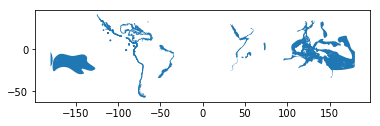

In [7]:
%matplotlib inline
data.plot()

Voilá! As we can see, it is really easy to produce a map out of your Shapefile with geopandas. Geopandas automatically positions your map in a way that it covers the whole extent of your data.

## Writing a Shapefile

Writing the spatial data into disk for example as a new Shapefile is also something that is needed frequently.

- Let's select 50 first rows of the input data and write those into a new Shapefile by first selecting the data using index slicing and
then write the selection into a Shapefile with ``gpd.to_file()`` -function:


In [8]:
# Create a output path for the data
outfp = "L2_data/DAMSELFISH_distributions_SELECTION.shp"

# Select first 50 rows
selection = data[0:50]

# Write those rows into a new Shapefile (the default output file format is Shapefile)
selection.to_file(outfp)

**TASK:** Read the newly created Shapefile with geopandas, and see how the data looks like.

## Geometries in Geopandas

Geopandas takes advantage of Shapely's geometric objects. Geometries are stored in a column called *geometry* that is a default column name for
storing geometric information in geopandas.

-  Let's print the first 5 rows of the column 'geometry':

In [10]:
# It is possible to get a specific column by specifying the column name within square brackets []
print(data['geometry'].head())

0    POLYGON ((-115.6437454219999 29.71392059300007...
1    POLYGON ((-105.589950704 21.89339825500002, -1...
2    POLYGON ((-111.159618439 19.01535626700007, -1...
3    POLYGON ((-80.86500229899997 -0.77894492099994...
4    POLYGON ((-67.33922225599997 -55.6761029239999...
Name: geometry, dtype: object


As we can see the `geometry` column contains familiar looking values, namely Shapely `Polygon` -objects that we [learned to use last week](https://automating-gis-processes.github.io/2018/notebooks/L1/geometric-objects.html#Polygon). Since the spatial data is stored as Shapely objects, **it is possible to use all of the functionalities of Shapely module**.

- Let's prove that this really is the case by iterating over a sample of the data, and printing the `area` of first five polygons. 

  - We can iterate over the rows by using the `iterrows()` -function that we learned [during the Lesson 6 of the Geo-Python course](https://geo-python.github.io/2018/notebooks/L6/pandas/advanced-data-processing-with-pandas.html#Iterating-rows-and-using-self-made-functions-in-Pandas).

In [11]:
# Make a selection that contains only the first five rows
selection = data[0:5]

# Iterate over rows and print the area of a Polygon
for index, row in selection.iterrows():
    # Get the area of the polygon
    poly_area = row['geometry'].area
    # Print information for the user
    print("Polygon area at index {index} is: {area:.3f}".format(index=index, area=poly_area))

Polygon area at index 0 is: 19.396
Polygon area at index 1 is: 6.146
Polygon area at index 2 is: 2.697
Polygon area at index 3 is: 87.461
Polygon area at index 4 is: 0.001


As you might guess from here, all the functionalities of **Pandas**, such as the `iterrows()` function, are directly available in Geopandas without the need to call pandas separately because Geopandas is an **extension** for Pandas. 

- Let's next create a new column into our GeoDataFrame where we calculate and store the areas of individual polygons into that column. Calculating the areas of polygons is really easy in geopandas by using ``GeoDataFrame.area`` attribute. Hence, it is not needed to actually iterate over the rows line by line as we did previously:

In [14]:
# Create a new column called 'area' and assign the area of the Polygons into it
data['area'] = data.area

# Print first 2 rows of the area column
print(data['area'].head(2))

0    19.396254
1     6.145902
Name: area, dtype: float64


As we can see, the area of our first polygon seems to be approximately `19.396` and `6.146` for the second polygon. They correspond to the ones we saw in previous step when iterating rows, hence, everything seems to work as should.

- Let's check what is the `min`, `max` and `mean` of those areas using familiar functions from our previous Pandas lessions.


In [16]:
# Maximum area
max_area = data['area'].max()

# Minimum area
min_area = data['area'].min()

# Mean area
mean_area = data['area'].mean()

print("Max area: {max}\nMin area: {min}\nMean area: {mean}".format(max=round(max_area, 2), min=round(min_area, 2), mean=round(mean_area, 2)))

Max area: 1493.2
Min area: 0.0
Mean area: 19.96


The largest Polygon in our dataset seems to be around 1494 square decimal degrees (~ 165 000 km2) and the average size is ~20 square decimal degrees (~2200 km2). The minimum polygon size seems to be `0.0`, hence it seems that there exists really small polygons as well in the data as well (rounds to 0 with 2 decimals). 

## Creating geometries into a GeoDataFrame

Since geopandas takes advantage of Shapely geometric objects, it is possible to create a Shapefile from a scratch by passing Shapely's
geometric objects into the GeoDataFrame. This is useful as it makes it easy to convert e.g. a text file that contains coordinates into a
Shapefile. Next we will see how to create a Shapefile from scratch. 

- Let's create an empty `GeoDataFrame`.

In [28]:
# Import necessary modules first
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Create an empty geopandas GeoDataFrame
newdata = gpd.GeoDataFrame()

# Let's see what we have at the moment
print(newdata)

Empty GeoDataFrame
Columns: []
Index: []


As we can see, the GeoDataFrame is empty since we haven't yet stored any data into it.

- Let's create a new column called `geometry` that will contain our Shapely objects:

In [29]:
# Create a new column called 'geometry' to the GeoDataFrame
newdata['geometry'] = None

# Let's again see what's inside
print(newdata)

Empty GeoDataFrame
Columns: [geometry]
Index: []


Now we have a `geometry` column in our GeoDataFrame but we don't have any data stored yet.

- Let's create a Shapely `Polygon` repsenting the Helsinki Senate square that we can later insert to our GeoDataFrame:

In [30]:
# Coordinates of the Helsinki Senate square in Decimal Degrees
coordinates = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

# Let's see what we have
print(poly)

POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


Okay, now we have an appropriate `Polygon` -object.

- Let's insert the polygon into our 'geometry' column of our GeoDataFrame at position 0:

In [31]:
# Insert the polygon into 'geometry' -column at index 0
newdata.loc[0, 'geometry'] = poly

# Let's see what we have now
print(newdata)

                                            geometry
0  POLYGON ((24.950899 60.169158, 24.953492 60.16...


Great, now we have a GeoDataFrame with a Polygon that we could already now export to a Shapefile. However, typically you might want to include some useful information with your geometry. 

- Hence, let's add another column to our GeoDataFrame called `location` with text `Senaatintori` that describes the location of the feature.

In [32]:
# Add a new column and insert data 
newdata.loc[0, 'location'] = 'Senaatintori'

# Let's check the data
print(newdata)

                                            geometry      location
0  POLYGON ((24.950899 60.169158, 24.953492 60.16...  Senaatintori


Okay, now we have additional information that is useful for recognicing what the feature represents. 

Before exporting the data it is always good (basically necessary) to **determine the coordinate reference system (projection) for the GeoDataFrame.** GeoDataFrame has an attribute called `.crs` that shows the coordinate system of the data which is empty (None) in our case since we are creating the data from the scratch (more about projection on next tutorial):

In [33]:
print(newdata.crs)

None


-  Let's add a crs for our GeoDataFrame. A Python module called **fiona** has a nice function called ``from_epsg()`` for passing the coordinate reference system information for the GeoDataFrame. Next we will use that and determine the projection to WGS84 (epsg code: 4326):

In [34]:
# Import specific function 'from_epsg' from fiona module
from fiona.crs import from_epsg

# Set the GeoDataFrame's coordinate system to WGS84 (i.e. epsg code 4326)
newdata.crs = from_epsg(4326)

# Let's see how the crs definition looks like
print(newdata.crs)

{'init': 'epsg:4326', 'no_defs': True}


As we can see, now we have associated coordinate reference system information (i.e. `CRS`) into our `GeoDataFrame`. The CRS information here, is a Python `dictionary` containing necessary values for geopandas to create a `.prj` file for our Shapefile that contains the CRS info. 

-  Finally, we can export the GeoDataFrame using `.to_file()` -function. The function works quite similarly as the export functions in numpy or pandas, but here we only need to provide the output path for the Shapefile. Easy isn't it!:

In [35]:
# Determine the output path for the Shapefile
outfp = "L2_data/Senaatintori.shp"

# Write the data into that Shapefile
newdata.to_file(outfp)

Now we have successfully created a Shapefile from the scratch using only Python programming. Similar approach can be used to for example to read
coordinates from a text file (e.g. points) and create Shapefiles from those automatically.

**TASK:** Check the output Shapefile by reading it with geopandas and make sure that the attribute table and geometry seems correct.

## Practical example: Saving multiple Shapefiles

One really useful function that can be used in Pandas/Geopandas is [.groupby()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html). We saw and used this function already in [Lesson 6 of the Geo-Python course](https://geo-python.github.io/2018/notebooks/L6/pandas/advanced-data-processing-with-pandas.html#Aggregating-data-in-Pandas-by-grouping). Group by function is useful to group data based on values on selected column(s).

Next we will take a practical example by automating the file export task. We will group individual fish subspecies in our `DAMSELFISH_distribution.shp` and export those into separate Shapefiles.

- Let's start from scratch and read the Shapefile into GeoDataFrame


In [37]:
# Read Damselfish data
fp = "L2_data/DAMSELFISH_distributions.shp"
data = gpd.read_file(fp)

# Print columns
print(data.columns)

Index(['ID_NO', 'BINOMIAL', 'ORIGIN', 'COMPILER', 'YEAR', 'CITATION', 'SOURCE',
       'DIST_COMM', 'ISLAND', 'SUBSPECIES', 'SUBPOP', 'LEGEND', 'SEASONAL',
       'TAX_COMM', 'RL_UPDATE', 'KINGDOM_NA', 'PHYLUM_NAM', 'CLASS_NAME',
       'ORDER_NAME', 'FAMILY_NAM', 'GENUS_NAME', 'SPECIES_NA', 'CATEGORY',
       'geometry'],
      dtype='object')


The `BINOMIAL` column in the data contains information about different fish subspecies (their latin name). With `.unique()` -function we can quickly see all different names in that column:

In [38]:
# Print all unique fish subspecies in 'BINOMIAL' column
print(data['BINOMIAL'].unique())

['Stegastes leucorus' 'Chromis intercrusma' 'Stegastes beebei'
 'Stegastes rectifraenum' 'Chromis punctipinnis' 'Chromis crusma'
 'Chromis pembae' 'Stegastes redemptus' 'Teixeirichthys jordani'
 'Chromis limbaughi' 'Microspathodon dorsalis' 'Chromis cyanea'
 'Amphiprion sandaracinos' 'Nexilosus latifrons' 'Stegastes baldwini'
 'Microspathodon bairdii' 'Azurina eupalama' 'Chromis flavicauda'
 'Stegastes arcifrons' 'Chromis alta' 'Abudefduf declivifrons'
 'Chromis alpha' 'Stegastes flavilatus' 'Abudefduf concolor'
 'Abudefduf troschelii' 'Chrysiptera flavipinnis' 'Chromis atrilobata'
 'Stegastes acapulcoensis' 'Hypsypops rubicundus' 'Azurina hirundo']


- Now we can use that information to group our data and save all individual fish subspecies as separate Shapefiles:

In [39]:
# Group the data by column 'BINOMIAL'
grouped = data.groupby('BINOMIAL')

# Let's see what we have
grouped

As we can see, `groupby` -function gives us an object called `DataFrameGroupBy` which is similar to list of keys and values (in a dictionary) that we can iterate over. This is again exactly similar thing that we already practiced during [Lesson 6 of the Geo-Python course](https://geo-python.github.io/2018/notebooks/L6/pandas/advanced-data-processing-with-pandas.html#Aggregating-data-in-Pandas-by-grouping).

- Let's iterate over the groups and see what our variables `key` and `values` contain

In [41]:
# Iterate over the group object
for key, values in grouped:
    individual_fish = values

# Let's see what is the LAST item and key that we iterated
print('Key:', key)
print(individual_fish)

Key: Teixeirichthys jordani
       ID_NO                BINOMIAL  ORIGIN COMPILER  YEAR  \
27  154915.0  Teixeirichthys jordani       1     None  2012   
28  154915.0  Teixeirichthys jordani       1     None  2012   
29  154915.0  Teixeirichthys jordani       1     None  2012   
30  154915.0  Teixeirichthys jordani       1     None  2012   
31  154915.0  Teixeirichthys jordani       1     None  2012   
32  154915.0  Teixeirichthys jordani       1     None  2012   
33  154915.0  Teixeirichthys jordani       1     None  2012   

                                             CITATION SOURCE DIST_COMM ISLAND  \
27  Red List Index (Sampled Approach), Zoological ...   None      None   None   
28  Red List Index (Sampled Approach), Zoological ...   None      None   None   
29  Red List Index (Sampled Approach), Zoological ...   None      None   None   
30  Red List Index (Sampled Approach), Zoological ...   None      None   None   
31  Red List Index (Sampled Approach), Zoological ...   None  

From here we can see that the `individual_fish` -variable contains all the rows that belongs to a fish called `Teixeirichthys jordani` that is the `key` for conducting the grouping. Notice that the index numbers refer to the row numbers in the original data -GeoDataFrame.

- Let's check the datatype of the grouped object:

In [42]:
type(individual_fish)

geopandas.geodataframe.GeoDataFrame

As we can see, each set of data are now grouped into separate GeoDataFrames that we can export into Shapefiles using the variable `key`
for creating the output filename. Next, we use a specific string formatting method to produce the output filename using `% operator` ([read more here]( https://www.learnpython.org/en/String_Formatting)).

- Let's now export all individual subspecies into separate Shapefiles:

In [45]:
# Import os -module that is useful for parsing filepaths
import os

# Determine output directory
out_directory = "L2_data"

# Create a new folder called 'Results' 
result_folder = os.path.join(out_directory, 'Results')

# Check if the folder exists already
if not os.path.exists(result_folder):
    # If it does not exist, create one
    os.makedirs(result_folder)

# Iterate over the groups
for key, values in grouped:
    # Format the filename (replace spaces with underscores using 'replace()' -function)
    output_name = "%s.shp" % key.replace(" ", "_")

    # Print some information for the user
    print("Processing: %s" % key)

    # Create an output path
    outpath = os.path.join(result_folder, output_name)

    # Export the data
    values.to_file(outpath)

Processing: Abudefduf concolor
Processing: Abudefduf declivifrons
Processing: Abudefduf troschelii
Processing: Amphiprion sandaracinos
Processing: Azurina eupalama
Processing: Azurina hirundo
Processing: Chromis alpha
Processing: Chromis alta
Processing: Chromis atrilobata
Processing: Chromis crusma
Processing: Chromis cyanea
Processing: Chromis flavicauda
Processing: Chromis intercrusma
Processing: Chromis limbaughi
Processing: Chromis pembae
Processing: Chromis punctipinnis
Processing: Chrysiptera flavipinnis
Processing: Hypsypops rubicundus
Processing: Microspathodon bairdii
Processing: Microspathodon dorsalis
Processing: Nexilosus latifrons
Processing: Stegastes acapulcoensis
Processing: Stegastes arcifrons
Processing: Stegastes baldwini
Processing: Stegastes beebei
Processing: Stegastes flavilatus
Processing: Stegastes leucorus
Processing: Stegastes rectifraenum
Processing: Stegastes redemptus
Processing: Teixeirichthys jordani


Excellent! Now we have saved those individual fishes into separate Shapefiles and named the file according to the species name. These kind of grouping operations can be really handy when dealing with Shapefiles. Doing similar process manually would be really laborious and error-prone.

## Summary

In this tutorial we introduced the first steps of using geopandas. More specifically you should know how to:

**1)** Read data from Shapefile using geopandas,

**2)** Write GeoDataFrame data from Shapefile using geopandas,

**3)** Create a GeoDataFrame from scratch, and

**4)** automate a task to save specific rows from data into Shapefile based on specific key using `groupby()` -function. 